### Reference: 
- https://bbs.huaweicloud.com/blogs/409239
- https://blog.csdn.net/m0_59113223/article/details/132259143?spm=1001.2101.3001.6650.12&utm_medium=distribute.pc_relevant.none-task-blog-2%7Edefault%7ECTRLIST%7ERate-12-132259143-blog-125170709.235%5Ev43%5Econtrol&depth_1-utm_source=distribute.pc_relevant.none-task-blog-2%7Edefault%7ECTRLIST%7ERate-12-132259143-blog-125170709.235%5Ev43%5Econtrol&utm_relevant_index=20

MMSegmentation是一个基于Pytorch的开源语义分割工具箱，他是OpenMMLab项目的一部分 GitHub：GitHub - open-mmlab/mmsegmentation: OpenMMLab Semantic Segmentation Toolbox and Benchmark. MMseg提供的模块化设计极大便利了使用者，特别是用于入门学习，对于各类常用网络模型的即插即用集合，非常适合快速上手。
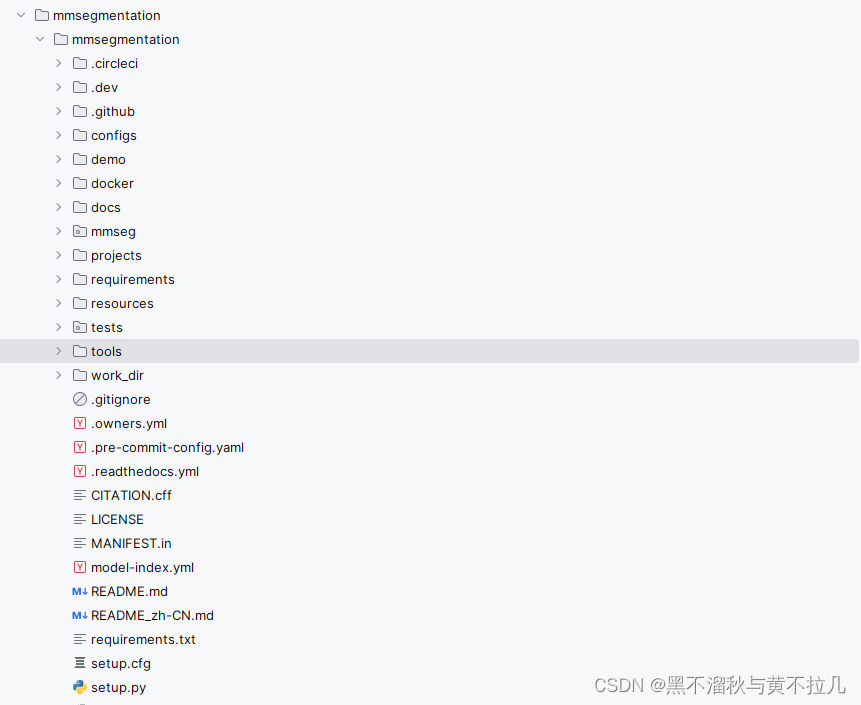

### 1. Setup Environment

- Create new conda environment: `conda create --name mmseg python=3.9`
- Activate new env: `conda activate mmseg`
- Install and activate ipykernel:
    - `conda install -c conda-forge ipykernel`
    - `python -m ipykernel install --user --name=mmseg`

<br>

- install pyTorch 1.13: `conda install pytorch==1.13.1 torchvision==0.14.1 torchaudio==0.13.1 pytorch-cuda=11.7 -c pytorch -c nvidia`
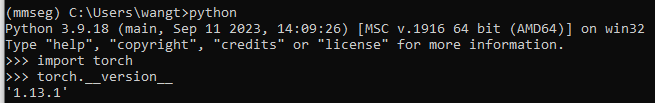
- Install MIM: `pip install -U openmim`
- Install MMCV with MIM: 
    - `mim install mmengine`
    - `mim install 'mmcv==2.0.0rc4'`
- OpenCV and others: `pip install opencv-python pillow matplotlib seaborn tqdm pytorch-lightning 'mmdet>=3.0.0rc1'`

- Clone Github to local: `git clone https://github.com/open-mmlab/mmsegmentation.git -b dev-1.x`
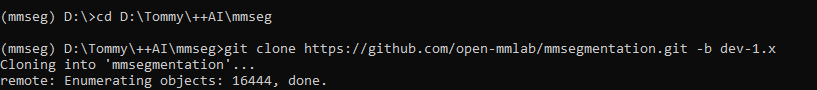

- enter subfolder "mmsegmentation"
- Install: `pip install -v -e .`
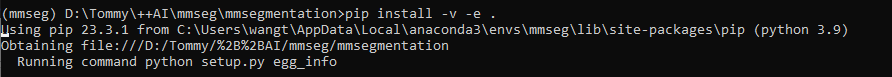
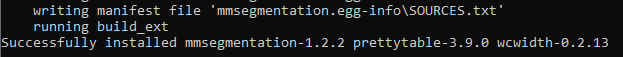

- Create the following folders manually

In [ ]:
import os

# 创建 checkpoint 文件夹，用于存放预训练模型权重文件
#os.mkdir('checkpoint')

# 创建 outputs 文件夹，用于存放预测结果
#os.mkdir('outputs')

# 创建 data 文件夹，用于存放图片和视频素材
#os.mkdir('data')

### 2. Download Data
### 2.1 Weight to checkpoint folder
- Model Zoo：https://github.com/open-mmlab/mmsegmentation/blob/master/docs/en/model_zoo.md
 从 Model Zoo 获取 PSPNet 预训练模型，下载并保存在 checkpoint 文件夹中
 - !wget https://download.openmmlab.com/mmsegmentation/v0.5/pspnet/pspnet_r50-d8_512x1024_40k_cityscapes/pspnet_r50-d8_512x1024_40k_cityscapes_20200605_003338-2966598c.pth -P checkpoint
 
- windows: 
    - download pth file from "https://download.openmmlab.com/mmsegmentation/v0.5/pspnet/pspnet_r50-d8_512x1024_40k_cityscapes/pspnet_r50-d8_512x1024_40k_cityscapes_20200605_003338-2966598c.pth"
    - move the file to checkpoint folder

### 2.2 Download imagesand videos
- 伦敦街景图片
    - !wget https://zihao-openmmlab.obs.cn-east-3.myhuaweicloud.com/20220713-mmdetection/images/street_uk.jpeg -P data

- 上海驾车街景视频，视频来源：https://www.youtube.com/watch?v=ll8TgCZ0plk
    - !wget https://zihao-download.obs.cn-east-3.myhuaweicloud.com/detectron2/traffic.mp4 -P data

- 街拍视频，2022年3月30日
- !wget https://zihao-openmmlab.obs.cn-east-3.myhuaweicloud.com/20220713-mmdetection/images/street_20220330_174028.mp4 -P data

#### Windows download from the links above and move files to Data folder

### 3. Check all libraries and versions, makes sure they are correctly installed

### 3.1 Check Pytorch

In [1]:
# 检查 Pytorch
import torch, torchvision
print('Pytorch 版本', torch.__version__)
print('CUDA 是否可用',torch.cuda.is_available())

C:\Users\wangt\AppData\Local\anaconda3\envs\mmseg\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Pytorch 版本 1.13.1
CUDA 是否可用 True


### 3.2 Check mmcv

In [2]:
import mmcv
from mmcv.ops import get_compiling_cuda_version, get_compiler_version
print('MMCV版本', mmcv.__version__)
print('CUDA版本', get_compiling_cuda_version())
print('编译器版本', get_compiler_version())

MMCV版本 2.0.0rc4
CUDA版本 11.7
编译器版本 MSVC 192829924


### 3.3 Check mmsegmentation

In [3]:
import mmseg
from mmseg.utils import register_all_modules
from mmseg.apis import inference_model, init_model
print('mmsegmentation版本', mmseg.__version__)

ModuleNotFoundError: No module named 'ftfy'

### 3.4 Prepare for matplotlib

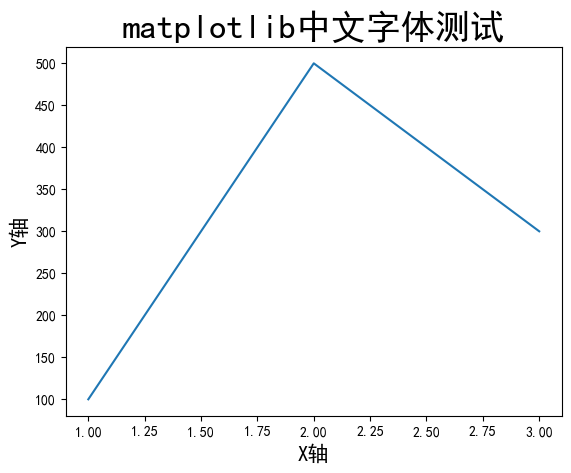

In [5]:
# # windows操作系统
plt.rcParams['font.sans-serif']=['SimHei']  # 用来正常显示中文标签 
plt.rcParams['axes.unicode_minus']=False  # 用来正常显示负号

# Mac操作系统，参考 https://www.ngui.cc/51cto/show-727683.html
# 下载 simhei.ttf 字体文件
# !wget https://zihao-openmmlab.obs.cn-east-3.myhuaweicloud.com/20220716-mmclassification/dataset/SimHei.ttf

# Linux操作系统，例如 云GPU平台：https://featurize.cn/?s=d7ce99f842414bfcaea5662a97581bd1
# 如果遇到 SSL 相关报错，重新运行本代码块即可
#!wget https://zihao-openmmlab.obs.cn-east-3.myhuaweicloud.com/20220716-mmclassification/dataset/SimHei.ttf -O /environment/miniconda3/lib/python3.7/site-packages/matplotlib/mpl-data/fonts/ttf/SimHei.ttf
#!rm -rf /home/featurize/.cache/matplotlib

import matplotlib 
import matplotlib.pyplot as plt
matplotlib.rc("font",family='SimHei') # 中文字体

plt.plot([1,2,3], [100,500,300])
plt.title('matplotlib中文字体测试', fontsize=25)
plt.xlabel('X轴', fontsize=15)
plt.ylabel('Y轴', fontsize=15)
plt.show()

### 4. Quick Test

`python demo\image_demo.py data\street_uk.jpeg configs/pspnet/pspnet_r50-d8_4xb2-40k_cityscapes-512x1024.py https://download.openmmlab.com/mmsegmentation/v0.5/pspnet/pspnet_r50-d8_512x1024_40k_cityscapes/pspnet_r50-d8_512x1024_40k_cityscapes_20200605_003338-2966598c.pth --out-file outputs\B1_uk_pspnet.jpg --device cuda:0 --opacity 0.5`

#### Original Image 
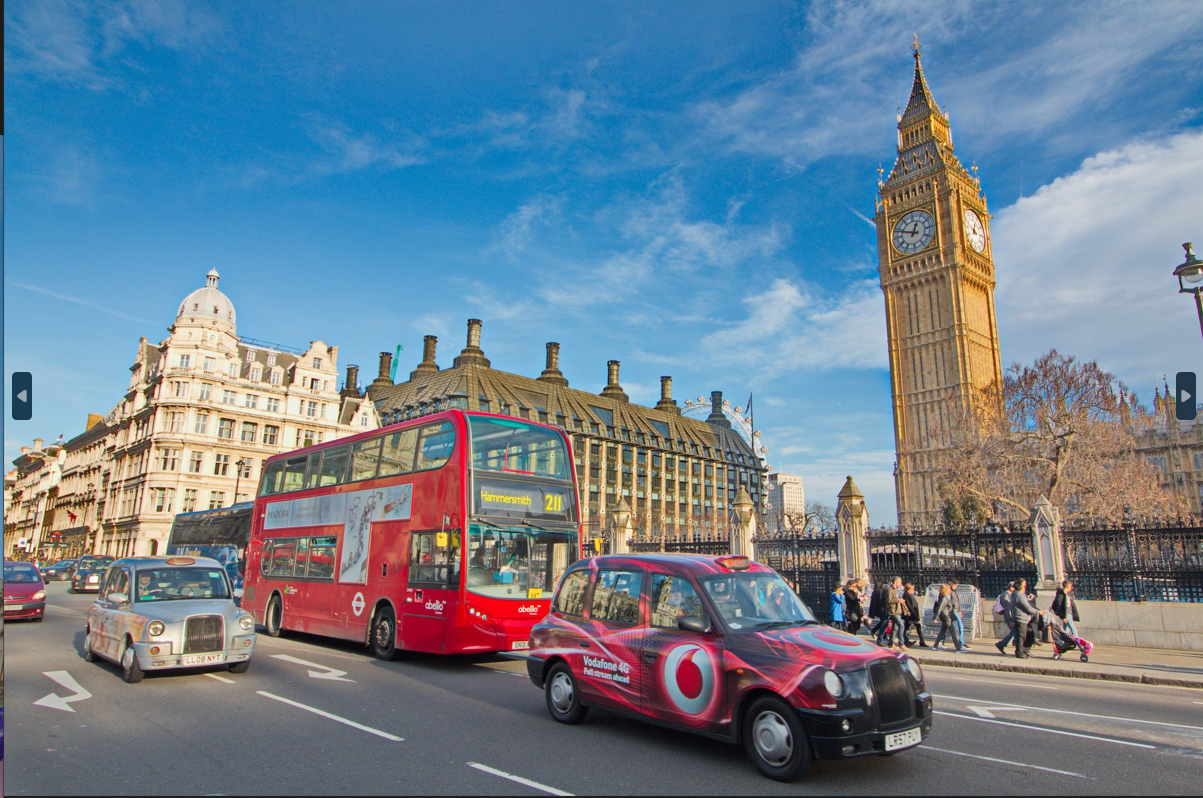

#### Result: Segmented Image
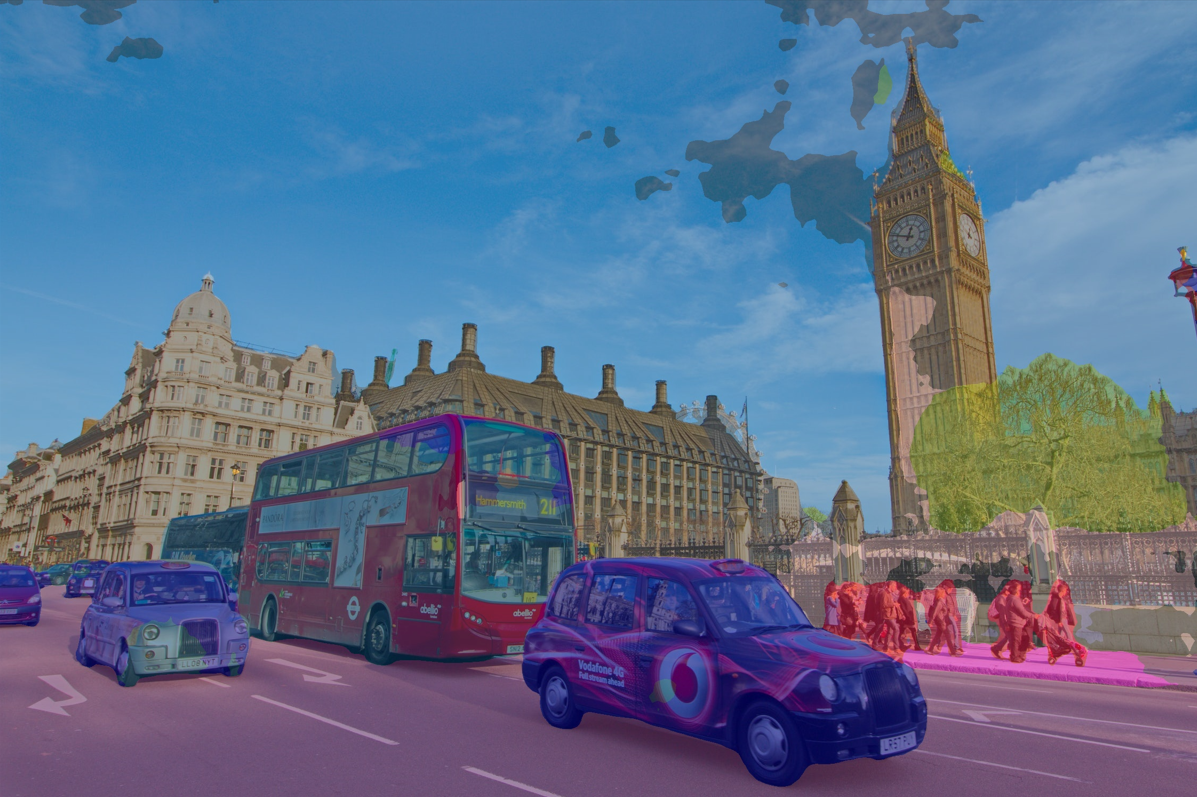

#### Radar Test with City Model
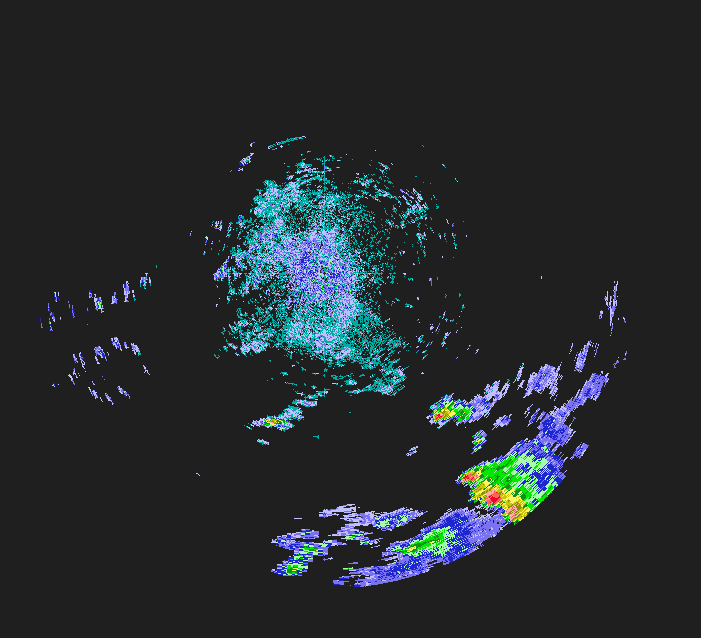

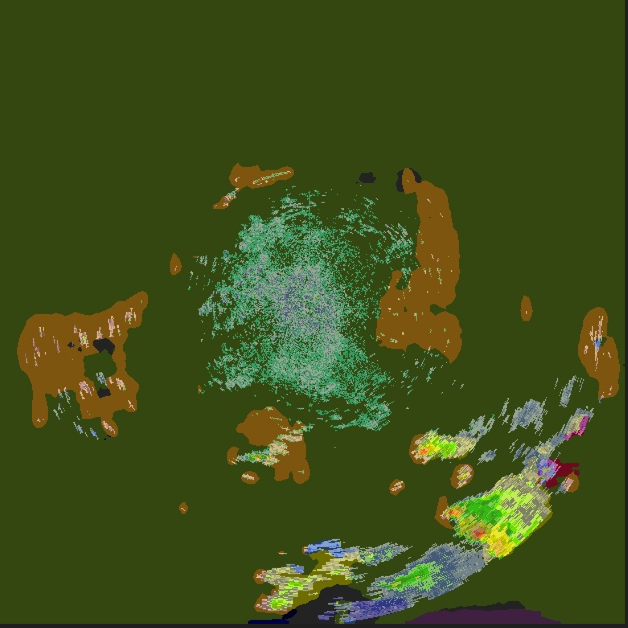